# 라이브러리

In [1]:
# 데이터 핸들링 및 기타
import numpy as np
import pandas as pd
import time
import random

# 시각화 모듈
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import seaborn as sns

# 데이터 전처리 모듈
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from imblearn.under_sampling import *
from imblearn.over_sampling import *

# ML 모듈
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 평가 모듈
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.decomposition import PCA
from sklearn import metrics

# 데이터 전처리

In [3]:
# 데이터 로드
train = pd.read_csv('train.csv')
train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,genre2
0,0.681,0.500,10,-8.854,1,0.0294,0.56600,0.000000,0.1120,0.306,119.993,257333,4,acoustic,acoustic
1,0.773,0.394,0,-9.252,1,0.0516,0.62700,0.000014,0.0953,0.443,74.977,212707,4,acoustic,acoustic
2,0.584,0.509,2,-13.109,1,0.0287,0.26700,0.002520,0.3600,0.367,90.457,175480,4,acoustic,acoustic
3,0.640,0.355,9,-8.579,1,0.0292,0.63700,0.000120,0.1080,0.208,127.874,245840,4,acoustic,acoustic
4,0.327,0.710,3,-2.928,1,0.0547,0.20200,0.000090,0.2800,0.416,179.561,175200,4,acoustic,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26473,0.798,0.524,9,-13.522,1,0.0538,0.01800,0.037100,0.0960,0.917,119.137,349373,4,funk,funk
26474,0.810,0.611,5,-11.425,0,0.0287,0.46700,0.005980,0.1690,0.965,124.514,242440,4,funk,funk
26475,0.798,0.748,11,-12.163,0,0.0360,0.05550,0.105000,0.0615,0.896,122.429,386360,4,funk,funk
26476,0.765,0.787,5,-7.955,0,0.0478,0.00344,0.865000,0.0832,0.962,116.817,393000,4,funk,funk


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26478 entries, 0 to 26477
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      26478 non-null  float64
 1   energy            26478 non-null  float64
 2   key               26478 non-null  int64  
 3   loudness          26478 non-null  float64
 4   mode              26478 non-null  int64  
 5   speechiness       26478 non-null  float64
 6   acousticness      26478 non-null  float64
 7   instrumentalness  26478 non-null  float64
 8   liveness          26478 non-null  float64
 9   valence           26478 non-null  float64
 10  tempo             26478 non-null  float64
 11  duration_ms       26478 non-null  int64  
 12  time_signature    26478 non-null  int64  
 13  genre             26478 non-null  object 
 14  genre2            26478 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 3.0+ MB


In [5]:
train.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
genre2              0
dtype: int64

In [6]:
train.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,26478.000000,26478.000000,26478.000000,26478.000000,26478.000000,26478.000000,26478.000000,26478.000000,26478.000000,26478.00000,26478.000000,2.647800e+04,26478.000000
mean,0.555572,0.703305,5.382053,-7.883233,0.615605,0.081666,0.198686,0.218167,0.202826,0.47030,124.237289,2.604382e+05,3.931755
std,0.179849,0.238310,3.565122,4.451586,0.486461,0.076181,0.295734,0.336654,0.171079,0.26071,27.786320,1.324595e+05,0.371069
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.052000e+04,0.000000
25%,0.433000,0.556000,2.000000,-9.748750,0.000000,0.038000,0.002110,0.000003,0.092500,0.25300,104.560000,1.954165e+05,4.000000
50%,0.563000,0.762000,6.000000,-6.811000,1.000000,0.053450,0.036500,0.002400,0.131000,0.45500,124.997000,2.376365e+05,4.000000
75%,0.690000,0.900000,9.000000,-4.887250,1.000000,0.090775,0.276000,0.411000,0.276000,0.67900,139.952000,3.019100e+05,4.000000
max,0.989000,1.000000,11.000000,1.342000,1.000000,0.960000,0.996000,0.997000,0.994000,0.99100,247.936000,4.753467e+06,5.000000


## Feature 시각화

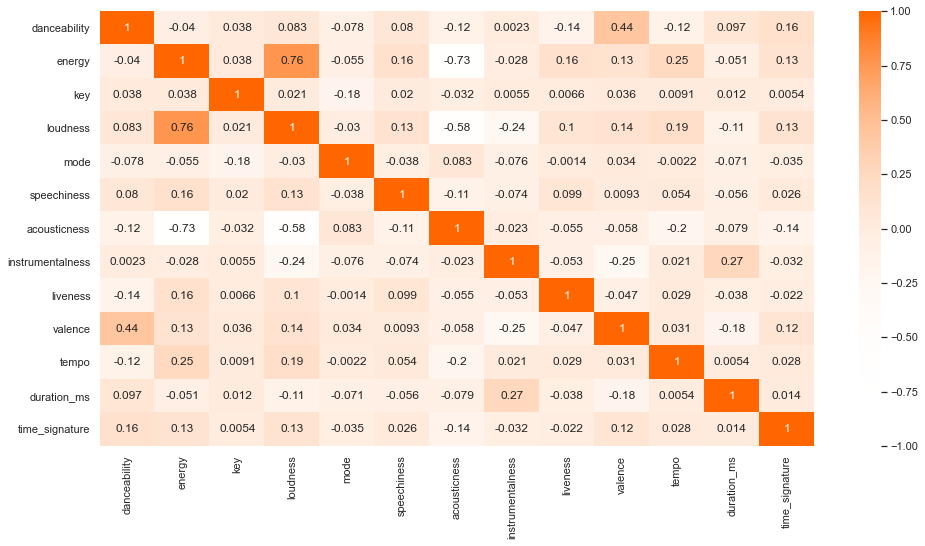

In [7]:
h = 24
s = 0.99
v = 1 
colors = [
    mcl.hsv_to_rgb((h/360,0,v)),
    mcl.hsv_to_rgb((h/360,0.5,v)),
    mcl.hsv_to_rgb((h/360,1,v)) ]

cmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=3)

pearson = train.corr(method = 'pearson')

plt.figure(figsize = (16,8))
sns.set(style = "whitegrid")
sns.heatmap(pearson, annot = True, cmap=cmap, vmin=-1, vmax=1)
plt.show();

## 이상치 제거 (미사용 코드)

In [8]:
# def get_outlier(train=None,column=None,weight=1.5):
        
#     column_x = train[column]
#     # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
#     quantile_25 = np.percentile(column_x.values,25)
#     quantile_75 = np.percentile(column_x.values,75)
    
#     # IQR을 구하고 IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
#     iqr = quantile_75 - quantile_25
#     iqr_weight = iqr * weight
#     lowest_val = quantile_25 - iqr_weight
#     highest_val = quantile_75 + iqr_weight
    
#     # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 Dataframe index 반환
#     outlier_index = column_x[(column_x < lowest_val) | (column_x > highest_val)].index
#     return outlier_index

## 컬럼 삭제 및 라벨 인코딩

In [9]:
train.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre', 'genre2'],
      dtype='object')

In [10]:
def drop_features(df):
    df.drop(['energy','acousticness','genre'],axis=1, inplace=True)
    return df

In [11]:
def encode_feature(df):
    features = ['genre2']
  
    for f in features:
        global le
        le = LabelEncoder()
        le.fit(df.loc[:,f])
        df.loc[:,f] = le.transform(df.loc[:,f])

    return df

In [12]:
def project_preprocess(df):
    df = pd.read_csv('train.csv')
    df = drop_features(df)
    df = encode_feature(df)
    return df

In [13]:
train_label = project_preprocess(train)
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26478 entries, 0 to 26477
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      26478 non-null  float64
 1   key               26478 non-null  int64  
 2   loudness          26478 non-null  float64
 3   mode              26478 non-null  int64  
 4   speechiness       26478 non-null  float64
 5   instrumentalness  26478 non-null  float64
 6   liveness          26478 non-null  float64
 7   valence           26478 non-null  float64
 8   tempo             26478 non-null  float64
 9   duration_ms       26478 non-null  int64  
 10  time_signature    26478 non-null  int64  
 11  genre2            26478 non-null  int32  
dtypes: float64(7), int32(1), int64(4)
memory usage: 2.3 MB


In [14]:
train_label.shape

(26478, 12)

In [15]:
train_label['genre2'].value_counts()

10    4725
22    4162
17    2001
27    1863
23    1378
1      929
0      920
15     906
21     887
7      841
24     836
12     517
9      469
13     468
3      462
11     462
2      459
6      457
25     457
8      456
26     455
19     454
18     452
20     451
16     406
4      405
5      100
14     100
Name: genre2, dtype: int64

In [16]:
temp = pd.DataFrame(train_label["genre2"].value_counts().sort_index())
temp["genre2_name"] = le.classes_
temp = temp.loc[:, ["genre2_name","genre2"]]
temp.rename(columns={"genre2": "genre2_count"}, inplace=True)
temp

,genre2_name,genre2_count
0,acoustic,920
1,alternative,929
2,blues,459
3,chill,462
4,classical,405
5,club,100
6,country,457
7,dance,841
8,disco,456
9,drum-and-bass,469


# 모델링

## 데이터 분리

In [17]:
y = train_label.loc[:,'genre2']
x = train_label.drop('genre2',axis = 1)

In [18]:
print(x.shape)
print(y.shape)

(26478, 11)
(26478,)


In [19]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1234, stratify=y)

In [20]:
print(x_train.shape, y_train.shape)
print(x_val.shape,y_val.shape)

(21182, 11) (21182,)
(5296, 11) (5296,)


## kfold, str_kfold, rkfold 설정

In [21]:
kfold = KFold(n_splits=7, random_state=1234, shuffle=True )

In [22]:
str_kfold = StratifiedKFold(n_splits=7, random_state=1234, shuffle=True)

In [23]:
rkfold = RepeatedKFold(n_splits=7, random_state=1234,  n_repeats=5)

## 샘플링에 따른 비교

In [24]:
def psampling(x):
    from imblearn.over_sampling import RandomOverSampler
    from imblearn.under_sampling import RandomUnderSampler
    
    label = train_label['genre2']
    ros = RandomOverSampler()
    rus = RandomUnderSampler()
    
    oversampled_train,oversampled_label = ros.fit_resample(x,label)
    undersampled_train,undersampled_label = rus.fit_resample(x,label)
    
    oversampled_train = pd.DataFrame(oversampled_train,columns = train_label.columns)
    undersampled_train = pd.DataFrame(undersampled_train,columns = train_label.columns)
    
    print('train =>',undersampled_label)
    print('원본 데이터의 클래스 비율\n{}'.format(pd.get_dummies(label)))
    print('원본 데이터의 클래스 비율\n{}'.format(pd.get_dummies(label).sum()))
    print('\noversampled_data\n{}'.format(pd.get_dummies(oversampled_label).sum()))
    print('\nundersampled_data\n{}'.format(pd.get_dummies(undersampled_label).sum()))

In [25]:
psampling(x)

train => 0        0
1        0
2        0
3        0
4        0
        ..
2795    27
2796    27
2797    27
2798    27
2799    27
Name: genre2, Length: 2800, dtype: int32
원본 데이터의 클래스 비율
       0   1   2   3   4   5   6   7   8   9   ...  18  19  20  21  22  23  \
0       1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1       1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2       1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
3       1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
4       1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
26473   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
26474   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
26475   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
26476   0   0   0   0   0   0   0 

In [26]:
# over sampling
smote = SMOTE(random_state=0)

x_train_over,y_train_over = smote.fit_resample(x_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (21182, 11) (21182,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (105840, 11) (105840,)
SMOTE 적용 후 레이블 값 분포: 
 0     3780
1     3780
26    3780
25    3780
24    3780
23    3780
22    3780
21    3780
20    3780
19    3780
18    3780
17    3780
16    3780
15    3780
14    3780
13    3780
12    3780
11    3780
10    3780
9     3780
8     3780
7     3780
6     3780
5     3780
4     3780
3     3780
2     3780
27    3780
Name: genre2, dtype: int64


## 모델

### 파일로 저장
- 1-1. lgbm_kf_rgs_best.pkl
- 1-2. lgbm_strk_rgs_best.pkl
- 1-3. rf_kf_rgs_best.pkl

- 2-1. lgbm_smote1_best.pkl

- 3-2. lgbm_enn1_best.pkl
- 3-3. lgbm_tl1_best.pkl
- 3-4. lgbm_smen1_best.pkl
- 3-5. lgbm_smtl1_best.pkl

- 4-1. lgbm_smote2_best.pkl
- 4-2. lgbm_smtl2_best.pkl
- 4-3.
- 4-4.
- 4-5. lgbm_smen2_best.pkl

- 5-1.

### 파라미터 조정 X
#### SVM

In [27]:
# model = SVC()
# model.fit(x_train, y_train)

# print('학습 데이터 점수: {}'.format(model.score(x_train, y_train)))
# print('평가 데이터 점수: {}'.format(model.score(x_val, y_val)))

In [28]:
# cross_val = cross_validate(
#     estimator=model,
#     X=x_train, y=y_train,
#     cv=5)

# print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

#### KNN

In [29]:
# model = KNeighborsClassifier()
# model.fit(x_train, y_train)

# print('학습 데이터 점수: {}'.format(model.score(x_train, y_train)))
# print('평가 데이터 점수: {}'.format(model.score(x_val, y_val)))

In [30]:
# cross_val = cross_validate(
#     estimator=model,
#     X=x_train, y=y_train,
#     cv=5)

# print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

#### DT

In [31]:
# model = DecisionTreeClassifier()
# model.fit(x_train, y_train)

# print('학습 데이터 점수: {}'.format(model.score(x_train, y_train)))
# print('평가 데이터 점수: {}'.format(model.score(x_val, y_val)))

In [32]:
# cross_val = cross_validate(
#     estimator=model,
#     X=x_train, y=y_train,
#     cv=5)

# print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

#### XGBC

In [33]:
# model = XGBClassifier()
# model.fit(x_train, y_train)

# print('학습 데이터 점수: {}'.format(model.score(x_train, y_train)))
# print('평가 데이터 점수: {}'.format(model.score(x_val, y_val)))

In [34]:
# cross_val = cross_validate(
#     estimator=model,
#     X=x_train, y=y_train,
#     cv=5)

# print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

#### LGBM

In [35]:
model = LGBMClassifier()
model.fit(x_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(x_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(x_val, y_val)))

학습 데이터 점수: 0.8539325842696629
평가 데이터 점수: 0.42371601208459214


In [36]:
cross_val = cross_validate(
    estimator=model,
    X=x_train, y=y_train,
    cv=5)

print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg test score: 0.4266365729489058 (+/- 0.008068547524647945)


### 파일로 저장
- 1-1. lgbm_kf_rgs_best.pkl
- 1-2. lgbm_strk_rgs_best.pkl
- 1-3. rf_kf_rgs_best.pkl

- 2-1. lgbm_smote1_best.pkl

- 3-2. lgbm_enn1_best.pkl
- 3-3. lgbm_tl1_best.pkl
- 3-4. lgbm_smen1_best.pkl
- 3-5. lgbm_smtl1_best.pkl

- 4-1. lgbm_smote2_best.pkl
- 4-2. lgbm_smtl2_best.pkl
- 4-3.
- 4-4.
- 4-5. lgbm_smen2_best.pkl

- 5-1.

# 평가

## 오차 행렬(Confusion Matrix)

In [37]:
from sklearn.metrics import confusion_matrix

predict = model.predict(x_val)
confmat = confusion_matrix(y_true=y_val, y_pred=predict)
print(confmat)

[[ 12   8   6   8   1   0   5   1   1   1  15   7   1   4   0   0   0   7
    0   1   2   1  57  18  27   0   1   0]
 [  6  10   0  13   0   0   0   0   3   0  19   2   3   2   0   0   0   8
    0   1   0   1 100   6   8   2   1   1]
 [  8   1  15   1   0   0   0   0   2   0   4   0   3   1   0   0   1   0
    0   0   0   0  26  14   4   7   4   1]
 [ 17   7   1   0   1   0   0   1   2   0  11   2   1   0   0   6   0   0
    0   0   4   3  18   4  10   3   0   1]
 [  0   0   0   0  52   0   0   0   0   0  11   0   0   0   0   0   4   1
   10   0   0   0   2   0   1   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0  15   0   0   0   0   0   0   0
    0   0   0   1   2   0   0   0   0   1]
 [  1   0   0   0   0   0  15   0   1   0   0   0   0   0   0   2   0   0
    0   0   1   0  57   5   8   1   0   0]
 [  1   0   0   0   0   1   0  43   0   0  59   0   3   0   0  11   0   1
    0   1   0  24  17   3   0   1   0   3]
 [  0   0   0   3   0   0   1   2   0   0  40   0   9   0   3   

## 다중 분류(Multi-Class Classification, 1:n)

In [38]:
print(len(x_val))
print(len(x_val)/28)

5296
189.14285714285714


In [39]:
le.classes_

array(['acoustic', 'alternative', 'blues', 'chill', 'classical', 'club',
       'country', 'dance', 'disco', 'drum-and-bass', 'electronic', 'folk',
       'funk', 'gospel', 'groove', 'hip-hop', 'jazz', 'metal', 'opera',
       'punk', 'r-n-b', 'reggae', 'rock', 'rock-n-roll',
       'singer-songwriter', 'soul', 'tango', 'techno'], dtype=object)

acoustic
TP: 12
FN: 172
FP: 90
TN: 5022
Accuracy: 0.9505287009063444
Recall: 0.06521739130434782
Precision: 0.11764705882352941
F1: 0.08391608391608392


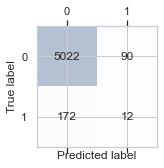

alternative
TP: 10
FN: 176
FP: 57
TN: 5053
Accuracy: 0.9560045317220544
Recall: 0.053763440860215055
Precision: 0.14925373134328357
F1: 0.07905138339920949


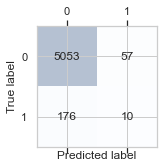

blues
TP: 15
FN: 77
FP: 36
TN: 5168
Accuracy: 0.9786631419939577
Recall: 0.16304347826086957
Precision: 0.29411764705882354
F1: 0.2097902097902098


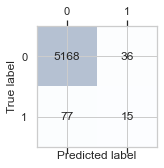

chill
TP: 0
FN: 92
FP: 60
TN: 5144
Accuracy: 0.9712990936555891
Recall: 0.0
Precision: 0.0
F1: nan


<ipython-input-40-20f2dd559739>:26: RuntimeWarning: invalid value encountered in double_scalars
  print('F1:', 2*(Precision*Recall)/(Precision+Recall))


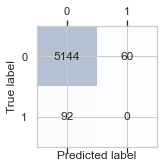

classical
TP: 52
FN: 29
FP: 31
TN: 5184
Accuracy: 0.9886706948640483
Recall: 0.6419753086419753
Precision: 0.6265060240963856
F1: 0.6341463414634146


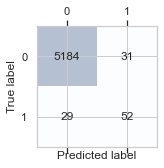

club
TP: 0
FN: 20
FP: 9
TN: 5267
Accuracy: 0.99452416918429
Recall: 0.0
Precision: 0.0
F1: nan


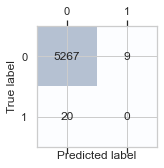

country
TP: 15
FN: 76
FP: 45
TN: 5160
Accuracy: 0.9771525679758308
Recall: 0.16483516483516483
Precision: 0.25
F1: 0.19867549668874174


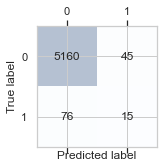

dance
TP: 43
FN: 125
FP: 83
TN: 5045
Accuracy: 0.9607250755287009
Recall: 0.25595238095238093
Precision: 0.3412698412698413
F1: 0.2925170068027211


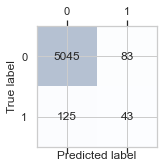

disco
TP: 0
FN: 91
FP: 66
TN: 5139
Accuracy: 0.9703549848942599
Recall: 0.0
Precision: 0.0
F1: nan


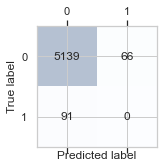

drum-and-bass
TP: 60
FN: 34
FP: 15
TN: 5187
Accuracy: 0.9907477341389728
Recall: 0.6382978723404256
Precision: 0.8
F1: 0.7100591715976332


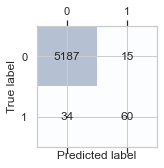

electronic
TP: 689
FN: 256
FP: 633
TN: 3718
Accuracy: 0.8321374622356495
Recall: 0.7291005291005291
Precision: 0.5211800302571861
F1: 0.607851786501985


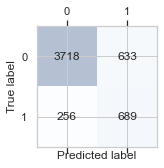

folk
TP: 0
FN: 92
FP: 40
TN: 5164
Accuracy: 0.9750755287009063
Recall: 0.0
Precision: 0.0
F1: nan


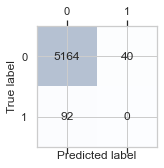

funk
TP: 18
FN: 86
FP: 54
TN: 5138
Accuracy: 0.9735649546827795
Recall: 0.17307692307692307
Precision: 0.25
F1: 0.20454545454545453


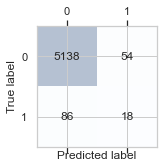

gospel
TP: 29
FN: 65
FP: 39
TN: 5163
Accuracy: 0.9803625377643505
Recall: 0.30851063829787234
Precision: 0.4264705882352941
F1: 0.35802469135802467


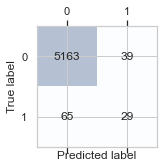

groove
TP: 0
FN: 20
FP: 6
TN: 5270
Accuracy: 0.9950906344410876
Recall: 0.0
Precision: 0.0
F1: nan


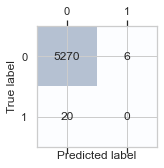

hip-hop
TP: 55
FN: 126
FP: 105
TN: 5010
Accuracy: 0.9563821752265861
Recall: 0.30386740331491713
Precision: 0.34375
F1: 0.32258064516129037


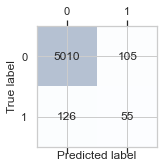

jazz
TP: 15
FN: 66
FP: 21
TN: 5194
Accuracy: 0.9835725075528701
Recall: 0.18518518518518517
Precision: 0.4166666666666667
F1: 0.2564102564102564


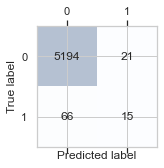

metal
TP: 277
FN: 123
FP: 119
TN: 4777
Accuracy: 0.9543051359516617
Recall: 0.6925
Precision: 0.6994949494949495
F1: 0.6959798994974874


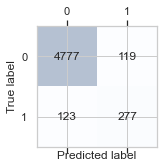

opera
TP: 53
FN: 37
FP: 27
TN: 5179
Accuracy: 0.9879154078549849
Recall: 0.5888888888888889
Precision: 0.6625
F1: 0.6235294117647059


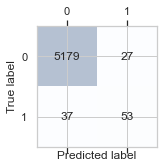

punk
TP: 6
FN: 85
FP: 27
TN: 5178
Accuracy: 0.9788519637462235
Recall: 0.06593406593406594
Precision: 0.18181818181818182
F1: 0.0967741935483871


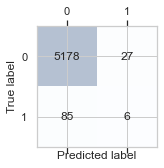

r-n-b
TP: 18
FN: 72
FP: 46
TN: 5160
Accuracy: 0.9777190332326284
Recall: 0.2
Precision: 0.28125
F1: 0.23376623376623376


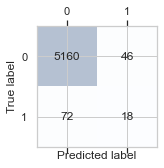

reggae
TP: 91
FN: 87
FP: 118
TN: 5000
Accuracy: 0.9612915407854985
Recall: 0.5112359550561798
Precision: 0.4354066985645933
F1: 0.47028423772609823


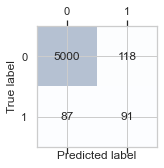

rock
TP: 487
FN: 346
FP: 844
TN: 3619
Accuracy: 0.7753021148036254
Recall: 0.5846338535414166
Precision: 0.36589030803906836
F1: 0.4500924214417745


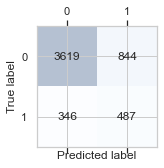

rock-n-roll
TP: 69
FN: 207
FP: 152
TN: 4868
Accuracy: 0.9322129909365559
Recall: 0.25
Precision: 0.31221719457013575
F1: 0.2776659959758551


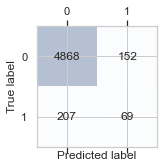

singer-songwriter
TP: 20
FN: 147
FP: 147
TN: 4982
Accuracy: 0.9444864048338368
Recall: 0.11976047904191617
Precision: 0.11976047904191617
F1: 0.11976047904191617


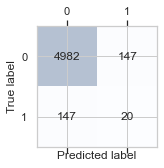

soul
TP: 5
FN: 86
FP: 40
TN: 5165
Accuracy: 0.9762084592145015
Recall: 0.054945054945054944
Precision: 0.1111111111111111
F1: 0.07352941176470587


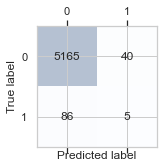

tango
TP: 19
FN: 72
FP: 30
TN: 5175
Accuracy: 0.9807401812688822
Recall: 0.2087912087912088
Precision: 0.3877551020408163
F1: 0.2714285714285714


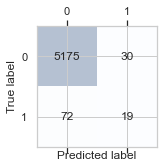

techno
TP: 186
FN: 187
FP: 112
TN: 4811
Accuracy: 0.9435422960725075
Recall: 0.49865951742627346
Precision: 0.6241610738255033
F1: 0.5543964232488823


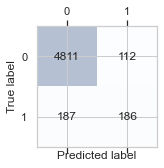

In [40]:
for i in range(len(le.classes_)):
    print(le.classes_[i])

    tot_num =sum(sum(confmat))
    
    TP = 0
    FN = 0
    FP = 0
    TN = 0

    TP = confmat[i,i]
    FN = sum(confmat[i, :])-confmat[i,i]
    FP = sum(confmat[:,i])-confmat[i,i]
    TN = tot_num - TP - FN - FP

    print("TP:", TP)
    print("FN:", FN)
    print("FP:", FP)
    print("TN:", TN)
    print('Accuracy:', (TP+TN) / (TP+FN+FP+TN))
    print('Recall:', TP / (TP+FN))
    print('Precision:', TP / (TP+FP))
   
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    print('F1:', 2*(Precision*Recall)/(Precision+Recall))

    # from sklearn.metrics import precision_score, recall_score => 이진 분류에서 가능.. 우리같이 멀티 컬럼일 경우 error
    # ref: https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html
    
    confmat2 = np.array([[TN, FP], [FN, TP]])

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat2.shape[0]):
        for j in range(confmat2.shape[1]):
            ax.text(x=j, y=i, s=confmat2[i,j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
    
    print('='*50)

## Micro average

TP: [ 12  10  15   0  52   0  15  43   0  60 689   0  18  29   0  55  15 277
  53   6  18  91 487  69  20   5  19 186]
FN: [ 90  57  36  60  31   9  45  83  66  15 633  40  54  39   6 105  21 119
  27  27  46 118 844 152 147  40  30 112]
FP: [ 90  57  36  60  31   9  45  83  66  15 633  40  54  39   6 105  21 119
  27  27  46 118 844 152 147  40  30 112]
TN: [5104 5172 5209 5176 5182 5278 5191 5087 5164 5206 3341 5216 5170 5189
 5284 5031 5239 4781 5189 5236 5186 4969 3121 4923 4982 5211 5217 4886]
TP 합: 2244
FN 합: 3052
FP 합: 3052
TN 합: 139940
Accuracy: 0.9588368580060423
Precision: 0.42371601208459214
Recall: 0.42371601208459214
F1: 0.4237160120845921


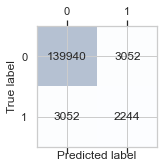

In [41]:
tot_num =sum(sum(confmat))   # y_val: (26460,)
i = range(0,28)

TP = 0
FN = 0
FP = 0
TN = 0

TP = confmat[i,i]
FN = sum(confmat[i, :])-confmat[i,i]
FP = sum(confmat[:,i])-confmat[i,i]
TN = tot_num - TP - FN - FP

sumtp=sum(TP)
sumfn=sum(FN)
sumfp=sum(FP)
sumtn=sum(TN)

print("TP:",TP)
print("FN:", FN)
print("FP:", FP)
print("TN:", TN)
print('='*50)

print("TP 합:",sum(TP))
print("FN 합:",sum(FN))
print("FP 합:",sum(FP))
print("TN 합:",sum(TN)) # TP가낮고 TN이 매우높은 이유 : 타겟이 너무많아서(28개)
print('='*50)

Precision = sumtp/(sumtp+sumfp)
Recall = sumtp/(sumtp+sumfn)

print('Accuracy:', (sumtp+sumtn) / (sumtp+sumfn+sumfp+sumtn)) # TP는 낮지만 TN은 매우높기때문에 정확도 자체는 높음... 
print('Precision:', sumtp/(sumtp+sumfp))
# 함수코드 : print("Precision Score : ",precision_score(y_val, predict, average='micro'))
print('Recall:', sumtp/(sumtp+sumfn)) # 오버샘플링을 한상태이므로 FN과 FP의 합이
# 함수코드 : print("Recall Score : ",recall_score(y_val, predict, average='micro'))
print('F1:', 2*(Precision*Recall)/(Precision+Recall)) # 같은 값을 조화평균하면 당연히 같은 값이 나옴
# 함수코드 : print("F1 Score : ",f1_score(y_val, predict, average='micro'))
print('='*50)

confmat3 = np.array([[sumtn, sumfp], [sumfn, sumtp]])

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat3, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat3.shape[0]):
    for j in range(confmat3.shape[1]):
        ax.text(x=j, y=i, s=confmat3[i,j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()